Tomi Salomaa <br>
student number  <br>
  <br>
November, 23th, 2020  <br>

# Data Analysis and Knowledge Discovery: Exercise 2, Data Understanding and Visualization

This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

Two datasets are used: shipdata1_2020.csv and shipdata2_2020.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

General guidance for exercises is given in the course Moodle page. <br>

- Answer to **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a completely correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly: elmasyr@utu.fi (mattermost.utu.fi, moodle chat or email).
- Note! Don't leave it to the last moment! Not feedback service dusring the weekend.
- The deadline is **Mon November 16th 23:59**

Gather *all* packages needed for this notebook here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
#from colab_pdf import colab_pdf

# Show the plots inline in the notebook
%matplotlib inline

In [2]:
# The print was not displaying all columns from the csv data so increased max columns from 0 to 10.
pd.options.display.max_columns=10

## 1. Know your data, a quick dive into domain knowledge

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/


Exercise data columns/attributes:
- MMSI
    * ?
- Speed
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- COG
    * Course Over Ground<br> COG=3600 means “not available”
- Destination
    * The Destination of the subject vessel according to the AIS transmissions
- Ship_type
    * The Shiptype of the subject vessel according to AIS transmissions -
- Gross_tonnage
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- Length
    * The overall Length (in metres) of the subject vessel
- Breadth
    * The Breadth (in metres) of the subject vessel

### Questions (add your answer below each question):

#### a) What does the column/feature MMSI represent, how unique is it and when is it updated?
<p>MMSI is the <b>Maritime Mobile Service Identity</b>. For maritime vessels it is a unique nine-digit number that includes a three-digit part (MID; the first 3 digits of MMSI) for specifying the geographical location where the vessel is registered. MMSI can be used to identify a vessel and it is programmed into a vessel's radio, thus it can be used to e.g. contact a vessel if it is found to be in distress.The number format is globally standardized.</p>

<p>MMSI follows the radio equipment it is initially assigned to. This means that in case the ownership of a vessel with MMSI assigned equipment changes, the MMSI should not be updated provided the radio equipment stays with the vessel. However, if the vessel will be registered to a different country than currently registered to then a new MMSI needs to be assigned and is thus updated.</p>

<p>Ownership details tied to the MMSI need to be updated in all cases if the vessel is sold / changes ownership. Thus, it is noteworthy that some manual information updating is always required even if the MMSI follows the equipment.<p>
<p><b>Extra references used:</b> 
<br/>https://www.milltechmarine.com/About-MMSI_ep_69.html
<br/>https://www.ic.gc.ca/eic/site/smt-gst.nsf/eng/sf01032.html#s6.2</p>

#### b) Out of the exercise data attributes, mention two examples of dynamic (updated more frequently, automatically or manually) and static (set on installation and updated only when ship ownership changes) data collected.<br>
<p><b><u>Dynamic</u></b></p>
<p><b>Speed:</b> Also known as speed over ground (SOG). This is automatically updated by AIS. If SOG = 1024, the value indicates that speed information is not available.</p>
<p><b>Destination:</b> Destination - and the attached information regarding estimated time of arrival (ETA) - is updated manually by the vessel's crew. Entered destination value is maximum of 20 characters long.</p>
<p><u><b>Static</u></b></p>
<p><b>MMSI:</b> As described above in question <i>a</i>; MMSI doesn't necessarily change but the information tied to it, such as the owner, vessel name and even the vessel call sign, should be updated when ownership changes.</p>
<p><b>Type of ship:</b> The vessel type is registered in the AIS in a standardized numerical value determined by the type of the vessel per owner's notice. The ship type is presented as two-digit value where the first digit refers to the general type of the vessel and the second digit provides additional, more detailed information about the type. In the data used here, however, it is already in a more descriptive text format. While this does not necessarily need to change when ownership changes, it is the only attribute mentioned above that could potentially update if for example the intended use of the vessel changes.</p>
<p><br/><b>Extra references used:</b><br/>https://help.marinetraffic.com/hc/en-us/articles/205579997-What-is-the-significance-of-the-AIS-Shiptype-number-</p>

#### c) Which information is/has been manually updated?<br>
<p>Destination</p>

#### d) For the vessel with the MMSI of 538002778, search for gross tonnage, length and breadth.<br>
<p>Gross tonnage: 30641</p>
<p>Length: 195 m</p>
<p>Breadth: 32.24 m</p>

## 2. Data import

#### a) First upload datafiles shipdata1.csv and shipdata2.csv using pandas.
Note! Files were prepared by two different persons, so there are differences in the file formatting, starting from columns separator.<br>

Read data from the open data source directly using the link. Use the url to obtain the data, not a local copy of the file.<br>

- https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv
- https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv

#### b) Print/show in notebook first 5 rows of both dataframes. 

In [3]:
# Load shipdata1.csv from the url1
url="https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv"
shipData1=pd.read_csv(url)
print(shipData1[:5])

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  212209000  10.1000  64.3000      Hamina     Cargo           3416    94.9   
1  212436000  13.5256  77.0755      Hamina    Tanker           6280   116.9   
2  219082000   9.9000  74.7000      Hamina    Tanker           9980   141.2   
3  219083000  11.6038  74.8000      Hamina    Tanker           9980   141.2   
4  219426000  11.9203  56.3253      Hamina    Tanker           3219    99.9   

   Breadth  
0     15.3  
1     18.0  
2     21.9  
3     21.6  
4     15.0  


In [4]:
# Load shipdata2.csv from the url2
url="https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv"
shipData2=pd.read_csv(url,sep=';',decimal=',')
print(shipData2[:5])

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11.3631  74.6552      Porvoo       NaN          30641  195.00   
1  636016752  11.7000  74.6000      Porvoo    Tanker           3853   92.90   
2  244870429  11.7126  69.5662      Porvoo    Tanker           7251  115.00   
3  305653000  10.8253  56.4266      Porvoo     Cargo           6668  107.03   
4  235060255  11.7311  80.9000    Primorsk    Tanker          23353  184.00   

   Breadth  
0    32.24  
1    15.30  
2    18.60  
3    18.42  
4    27.70  


## 3. Fix numeric data

#### a) The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

shipdata1_2020.csv uses a dot to separate decimals while shipdata2_2020.csv uses a comma.

#### b) Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [5]:
# This was noted prior by observing the data source and taking the difference into account when loading the data.
# Decimal separator was fixed when reading the data by the added parameter "decimal=','
# which tells the pandas read_csv to recognize the decimal varying from the standard '.' and convert it to the default form.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

#### c) Print first 5 rows of updated shipdata2 dataframe. 

In [6]:
print(shipData2[:5])

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11.3631  74.6552      Porvoo       NaN          30641  195.00   
1  636016752  11.7000  74.6000      Porvoo    Tanker           3853   92.90   
2  244870429  11.7126  69.5662      Porvoo    Tanker           7251  115.00   
3  305653000  10.8253  56.4266      Porvoo     Cargo           6668  107.03   
4  235060255  11.7311  80.9000    Primorsk    Tanker          23353  184.00   

   Breadth  
0    32.24  
1    15.30  
2    18.60  
3    18.42  
4    27.70  


## 4. Combine dataframes together

Tip for this section: Each subtask can be easily applied with one (or two) line(s) of code when using Pandas.

#### a) Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [7]:
shipData1['Origin']=1
shipData2['Origin']=2

#### b) Combine the two separate dataframes as one new dataframe.

In [8]:
combinedShipData = pd.concat([shipData1,shipData2],ignore_index=True,axis=0)

#### c) Check a sample of the new dataframe by random sample of six rows.


In [9]:
combinedShipData.sample(n=6)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
105,636011640,11.0401,83.5224,Ust-Luga,Tanker,62586,249.9,44.0,2
52,376593000,9.6000,82.4000,Paldiski,Cargo,2516,113.9,13.2,1
51,257033170,5.5000,98.8000,Paldiski,Tanker,27427,182.5,32.2,1
124,246650000,8.1000,74.5000,Vuosaari,Cargo,28599,168.1,27.0,2
89,235103736,8.9000,79.5000,Tallinn,Cargo,2840,89.7,13.6,2
39,305198000,9.8000,63.2000,Muuga,Cargo,1987,81.2,12.4,1


#### d) Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [10]:
print('combinedShipData dataframe shape: ',combinedShipData.shape)
print('\n')
combinedShipData.info()

combinedShipData dataframe shape:  (136, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 9.7+ KB


.info() method provides information about:
- index data type (Int64Index)
- rows and columns; shape of the dataframe
- column data types (int, float, float, object, object, int, float, float and int, respectively
- null values; Ship_type column has only 135 non-null values so one null value is included
- memory usage (current size in KB)
- summary of datatypes

## 5. Data cleaning

### Check if there is any missing data or duplicates.
#### a) Are there missing values?

In [11]:
print(combinedShipData.isna().any())
print(combinedShipData.isna().sum())

MMSI             False
Speed            False
COG              False
Destination      False
Ship_type         True
Gross_tonnage    False
Length           False
Breadth          False
Origin           False
dtype: bool
MMSI             0
Speed            0
COG              0
Destination      0
Ship_type        1
Gross_tonnage    0
Length           0
Breadth          0
Origin           0
dtype: int64


Yes. Searchin NaN values with the help of isna(), any() and sum() methods confirms the previous observation made with info(). The dataframe contains one NaN value within the Ship_type column.

#### b) Any duplilcate data; any vessel in the dataframe several times?

In [12]:
print('Identical MMSI values in dataframe: ',combinedShipData.MMSI.duplicated(keep=False).sum())

Identical MMSI values in dataframe:  4


<p>Because it would not be odd to find duplicates within columns such as speed, destination or ship technical specification related attributes, the only truly interesting attribute to compare is the MMSI.</p>
<p>Searching for duplicates within the MMSI column with the help of duplicated() method, four instances are found using the parameter 'keep=false'. With this parameter no originals / values to be kept are excluded so the sum itself does not at this point tell whether there are actually one or two vessels with duplicates found.</p>

#### c) Resolve missing data and remove duplicate data.
Tip! Two rows should be removed, but which ones?

In [13]:
print(combinedShipData[combinedShipData.MMSI.duplicated(keep=False)],'\n')
resolvedCombinedShipData=combinedShipData.drop([69,70],axis=0)
print('Dataframe info after removing duplicates:\n')
resolvedCombinedShipData.info()

         MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
66  538002778  11.3631  74.6552      Porvoo    Tanker          30641   195.0   
68  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   
69  538002778  11.3631  74.6552      Porvoo       NaN          30641   195.0   
70  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   

    Breadth  Origin  
66    32.24       1  
68    15.30       1  
69    32.24       2  
70    15.30       2   

Dataframe info after removing duplicates:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           134 non-null    int64  
 1   Speed          134 non-null    float64
 2   COG            134 non-null    float64
 3   Destination    134 non-null    object 
 4   Ship_type      134 non-null    object 
 5   Gross_tonnage  134 non-null

<p>Printing the found duplicate rows without exclusion of values shows us there are two vessels with duplicates within the dataframe.</p>
<p>Vessel with MMSI 538002778 (index 66 & 69) and another with MMSI 636016752 (index 68 & 70).</p>
<p>Regarding the first vessel, the row (index 69) originating from shipdata2_2020.csv should be treated as duplicate and removed as this also clears our NaN attribute value and there seems to be no other difference between the two rows.</p>
<p>Regarding the second vessel, while they originate from separate csvs as well, they are complete copies. By default the first one can be treated genuine and the second one (index 70) originating from shipdata2_2020.csv removed.</p>

## 6. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [14]:
# The column data types can be checked above from the info().
# Currently MMSI is int and will be converted to object.
# No string typed numeric attributes present in dataframe.

resolvedCombinedShipData['MMSI']=resolvedCombinedShipData['MMSI'].astype(object)
resolvedCombinedShipData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           134 non-null    object 
 1   Speed          134 non-null    float64
 2   COG            134 non-null    float64
 3   Destination    134 non-null    object 
 4   Ship_type      134 non-null    object 
 5   Gross_tonnage  134 non-null    int64  
 6   Length         134 non-null    float64
 7   Breadth        134 non-null    float64
 8   Origin         134 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 10.5+ KB


#### b) Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 

Questions: Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [15]:
shipDataNumOnly=resolvedCombinedShipData.drop(['MMSI','Destination','Ship_type',
                                               'Origin'],axis=1)
shipDataCount=shipDataNumOnly.count()
shipDataMean=shipDataNumOnly.mean()
shipDataStd=shipDataNumOnly.std()
shipDataMin=shipDataNumOnly.min()
shipData25=shipDataNumOnly.quantile(q=0.25)
shipData50=shipDataNumOnly.quantile(q=0.50)
shipData75=shipDataNumOnly.quantile(q=0.75)
shipDataMax=shipDataNumOnly.max()
print('Count:\n',shipDataCount)
print('\n')
print('Mean:\n',shipDataMean)
print('\n')
print('Std:\n',shipDataStd)
print('\n')
print('Min:\n',shipDataMin)
print('\n')
print('Quantile 25:\n',shipData25)
print('\n')
print('Quantile 50:\n',shipData50)
print('\n')
print('Quantile 75:\n',shipData75)
print('\n')
print('Max:\n',shipDataMax)

Count:
 Speed            134
COG              134
Gross_tonnage    134
Length           134
Breadth          134
dtype: int64


Mean:
 Speed               10.453009
COG                 78.271204
Gross_tonnage    13535.291045
Length             136.669776
Breadth             20.186716
dtype: float64


Std:
 Speed                1.955434
COG                 15.731984
Gross_tonnage    18433.591631
Length             124.040522
Breadth              9.943960
dtype: float64


Min:
 Speed              5.5000
COG               53.3264
Gross_tonnage    100.0000
Length            15.0000
Breadth            5.0000
dtype: float64


Quantile 25:
 Speed               8.961525
COG                71.053100
Gross_tonnage    2551.250000
Length             88.925000
Breadth            12.900000
Name: 0.25, dtype: float64


Quantile 50:
 Speed              10.30
COG                74.85
Gross_tonnage    5348.50
Length            115.00
Breadth            16.90
Name: 0.5, dtype: float64


Quantile 75:
 Spe

To answer the question whether the above comparisons make sense here:<br/>
- Origin value, while numerical, was omitted due to: our own addition and is more of a debug / helpful value than anyhing interesting analysis-wise.
- <b>Count:</b> Informative in the sense that it shows us we have 134 complete rows (with no NaN values), which is useful pre-work information in itself. Doesn't tell anything from analytical perspective.
- <b>Mean:</b> Could be interesting in terms of speed but maybe even more so regarding the attributes that are tied to vessel's physical aspects (gross tonnage, breadth, length). Though, it is hard to say if these data sets are representative of all tracked maritime vessel traffic, this would tell us about the physical dimensions of an average vessel at sea.
- <b>Std:</b> Also seems to make sense. Of course, COG probably doesn't gain much from standard deviation value.
- <b>Min & quantiles:</b>Seem to make sense. Again, COG won't gain much from this.
-<b>Max:</b> Mostly makes sense (and in theory is a useful method for all but COG, again). Speeds seem kind of on the low side with around 17 knots being max within the data. Of course, there's no information if these data sets were collected from some specific group where speeds around 17 knots are to be expected. The max length also stands out, being near 1400 meters. This at first made me wonder if the value would in fact be feets (~425 meters) but the min value and quartiles make more sense in terms of meter values. Also, MarineTraffic currently tracks vessels with top length of 1022 meters, which also adds to a feeling that the max value found in length attribute could be a <u>semantic error</u>.

#### c) Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these.

In [16]:
print(shipDataNumOnly.Breadth.describe())
print(shipDataNumOnly.Length.describe())
print(shipDataNumOnly.Gross_tonnage.describe())

count    134.000000
mean      20.186716
std        9.943960
min        5.000000
25%       12.900000
50%       16.900000
75%       24.880000
max       48.040000
Name: Breadth, dtype: float64
count     134.000000
mean      136.669776
std       124.040522
min        15.000000
25%        88.925000
50%       115.000000
75%       160.810000
max      1399.000000
Name: Length, dtype: float64
count      134.000000
mean     13535.291045
std      18433.591631
min        100.000000
25%       2551.250000
50%       5348.500000
75%      15558.250000
max      81502.000000
Name: Gross_tonnage, dtype: float64


#### d) Descriptive statistics by Ship_type
Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br>
Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.<br>

Questions: How many ship types there are? Which Ship type has the largest breadth?

In [17]:
shipTypeBreadthLengthTonnage=resolvedCombinedShipData.drop(
    ['MMSI','Destination','Speed','COG','Origin'],axis=1)
shipTypeBreadthLengthTonnage.groupby('Ship_type').describe().transpose()

Ship_type                   Cargo        Tanker         Tug
Gross_tonnage count     67.000000     58.000000    9.000000
              mean    7216.179104  22899.534483  230.222222
              std     9346.956372  22969.184878   98.255760
              min      852.000000   1825.000000  100.000000
              25%     2348.500000   5443.000000  139.000000
              50%     3259.000000  10957.500000  256.000000
              75%     6782.500000  30487.250000  298.000000
              max    45223.000000  81502.000000  366.000000
Length        count     67.000000     58.000000    9.000000
              mean     111.993582    181.951379   28.555556
              std       37.235145    172.170048    6.070031
              min       64.200000     46.900000   15.000000
              25%       87.870000    118.000000   26.800000
              50%      100.000000    144.100000   31.000000
              75%      123.750000    195.000000   32.900000
              max      229.040000   1399.000000   33.300000
Breadth       count     67.000000     58.000000    9.000000
              mean      16.841493     25.862759    8.511111
              std        5.984697     11.016503    1.749603
              min       10.500000      8.100000    5.000000
              25%       12.500000     16.900000    7.500000
              50%       14.400000     22.050000    9.000000
              75%       18.750000     32.200000    9.800000
              max       32.310000     48.040000   10.500000

The data sets contain three types of vessels: Cargo, Tanker and Tug.<br/>
Absolute, and with any other measured value than min, the largest breadth is observed with Tankers.

## 7. Attribute value distributions
#### a) Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Is this a feasible attribute for classification?

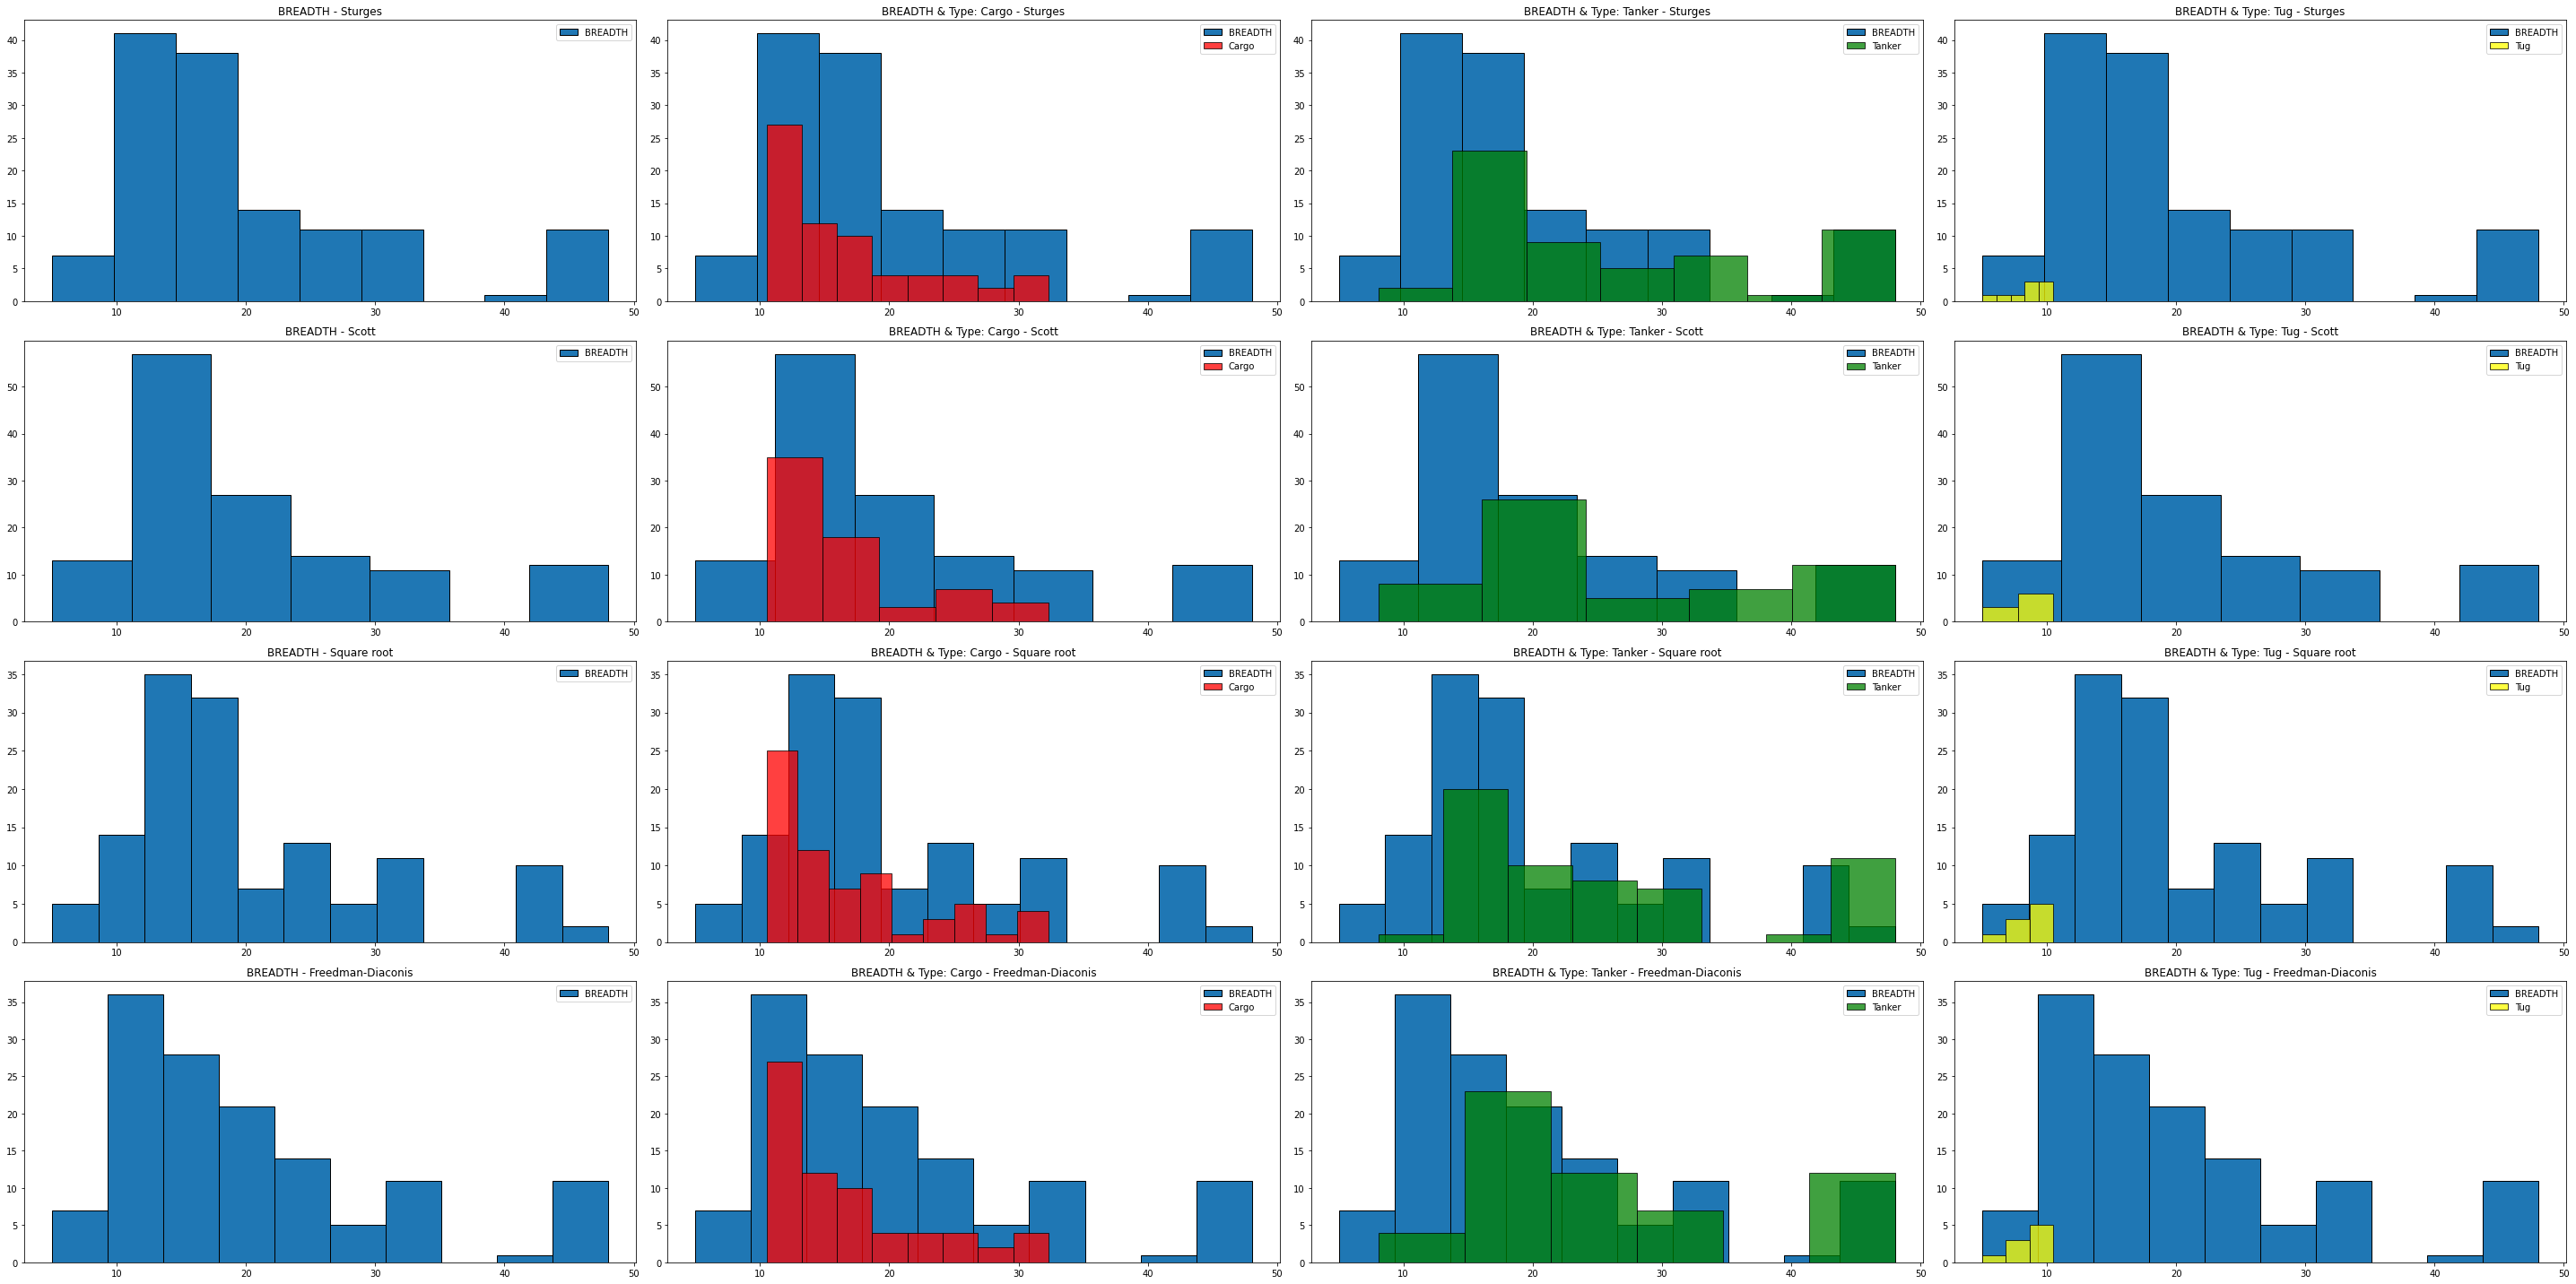

In [18]:
fig,axs = plt.subplots(4,4,figsize=(40,20))

# Creating subplot for Sturges
axs[0,0].set_title('BREADTH - Sturges')
axs[0,0].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sturges',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[0,0].legend()
axs[0,1].set_title('BREADTH & Type: Cargo - Sturges')
axs[0,1].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sturges',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[0,1].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Cargo']
              .Breadth, bins='sturges', edgecolor='black', color='red',
              linewidth=1, alpha=0.75, label='Cargo')
axs[0,1].legend()
axs[0,2].set_title('BREADTH & Type: Tanker - Sturges')
axs[0,2].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sturges',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[0,2].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tanker']
              .Breadth,bins='sturges', edgecolor='black', color='green',
              linewidth=1, alpha=0.75, label='Tanker')
axs[0,2].legend()
axs[0,3].set_title('BREADTH & Type: Tug - Sturges')
axs[0,3].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sturges',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[0,3].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tug']
              .Breadth,bins='sturges', edgecolor='black', color='yellow',
              linewidth=1, alpha=0.75, label='Tug')
axs[0,3].legend()

# Creating subplot for Scott
axs[1,0].set_title('BREADTH - Scott')
axs[1,0].hist(shipTypeBreadthLengthTonnage.Breadth,bins='scott',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[1,0].legend()
axs[1,1].set_title('BREADTH & Type: Cargo - Scott')
axs[1,1].hist(shipTypeBreadthLengthTonnage.Breadth, bins='scott',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[1,1].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Cargo']
              .Breadth, bins='scott', edgecolor='black', color='red',
              linewidth=1, alpha=0.75, label='Cargo')
axs[1,1].legend()
axs[1,2].set_title('BREADTH & Type: Tanker - Scott')
axs[1,2].hist(shipTypeBreadthLengthTonnage.Breadth, bins='scott',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[1,2].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tanker']
              .Breadth, bins='scott', edgecolor='black', color='green',
              linewidth=1, alpha=0.75, label='Tanker')
axs[1,2].legend()
axs[1,3].set_title('BREADTH & Type: Tug - Scott')
axs[1,3].hist(shipTypeBreadthLengthTonnage.Breadth,bins='scott',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[1,3].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tug']
              .Breadth, bins='scott', edgecolor='black', color='yellow',
              linewidth=1, alpha=0.75, label='Tug')
axs[1,3].legend()

# Creating subplot for Square
axs[2,0].set_title('BREADTH - Square root')
axs[2,0].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sqrt',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[2,0].legend()
axs[2,1].set_title('BREADTH & Type: Cargo - Square root')
axs[2,1].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sqrt',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[2,1].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Cargo']
              .Breadth, bins='sqrt', edgecolor='black', color='red',
              linewidth=1, alpha=0.75, label='Cargo')
axs[2,1].legend()
axs[2,2].set_title('BREADTH & Type: Tanker - Square root')
axs[2,2].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sqrt',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[2,2].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tanker']
              .Breadth, bins='sqrt', edgecolor='black', color='green',
              linewidth=1, alpha=0.75, label='Tanker')
axs[2,2].legend()
axs[2,3].set_title('BREADTH & Type: Tug - Square root')
axs[2,3].hist(shipTypeBreadthLengthTonnage.Breadth, bins='sqrt',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[2,3].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tug']
              .Breadth,bins='sqrt', edgecolor='black', color='yellow',
              linewidth=1, alpha=0.75, label='Tug')
axs[2,3].legend()

# Creating subplot for Freedman
axs[3,0].set_title('BREADTH - Freedman-Diaconis')
axs[3,0].hist(shipTypeBreadthLengthTonnage.Breadth, bins='fd',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[3,0].legend()
axs[3,1].set_title('BREADTH & Type: Cargo - Freedman-Diaconis')
axs[3,1].hist(shipTypeBreadthLengthTonnage.Breadth, bins='fd',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[3,1].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Cargo']
              .Breadth, bins='fd', edgecolor='black', color='red',
              linewidth=1, alpha=0.75, label='Cargo')
axs[3,1].legend()
axs[3,2].set_title('BREADTH & Type: Tanker - Freedman-Diaconis')
axs[3,2].hist(shipTypeBreadthLengthTonnage.Breadth, bins='fd',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[3,2].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tanker']
              .Breadth,bins='fd', edgecolor='black', color='green',
              linewidth=1, alpha=0.75, label='Tanker')
axs[3,2].legend()
axs[3,3].set_title('BREADTH & Type: Tug - Freedman-Diaconis')
axs[3,3].hist(shipTypeBreadthLengthTonnage.Breadth,bins='fd',
              edgecolor='black', linewidth=1, label='BREADTH')
axs[3,3].hist(shipTypeBreadthLengthTonnage
              .loc[shipTypeBreadthLengthTonnage['Ship_type']=='Tug']
              .Breadth, bins='fd', edgecolor='black', color='yellow',
              linewidth=1, alpha=0.75, label='Tug')
axs[3,3].legend()

fig.tight_layout()
plt.show()

Sturge's rule: k=1+3.322logn | n=134<br/>
Scott's rule: k=3.49σn^(−1/3) | σ=9.943960,n=134<br/>
Square root: sqrt(n) | n=134<br/>
Freedman-Diaconis' rule: 2(IQR)n−1/3 | IQR=16.9,n=134<br/>
<br/>
Distributions between different ship types don't necessarily seem to be different enough for only 'Breadth' attribute to be used for classifying. 'Tanker' and 'Cargo' types are somewhat in the same range, with 'Cargo' leaning more to the smaller side whereas 'Tanker' is quite even but also more heavily represented on the wider side. However, attempting to classify a single case based on breadth alone would be hard label as either of the two for any great certainity.<br/>
'Tug' vessels are more so entirely separateable from the two other vessel types. There is some overlap with 'Tanker' but most of the cases would be separateable.

#### b)	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Any outliers that require some action with the data?

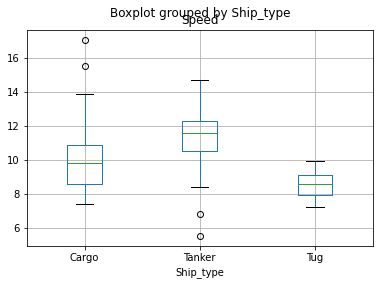

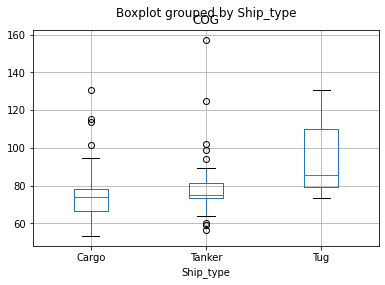

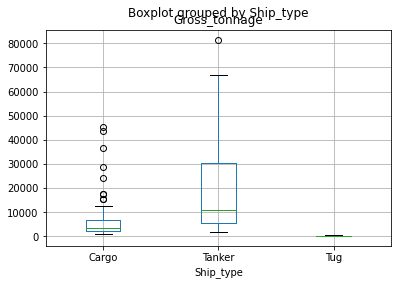

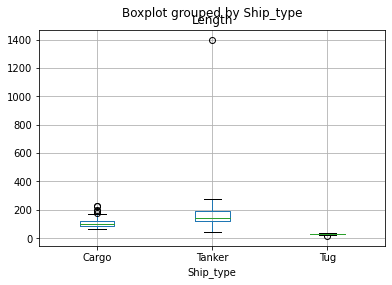

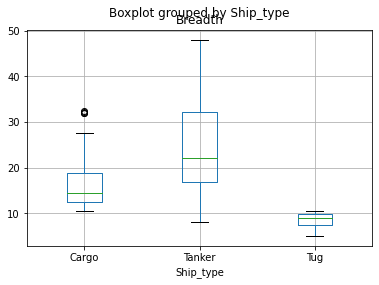

In [19]:
shipNumDataToBox=resolvedCombinedShipData.drop(['MMSI','Destination','Origin']
                                               ,axis=1)
shipNumDataToBox.boxplot('Speed',by='Ship_type')
shipNumDataToBox.boxplot('COG',by='Ship_type')
shipNumDataToBox.boxplot('Gross_tonnage',by='Ship_type')
shipNumDataToBox.boxplot('Length',by='Ship_type')
shipNumDataToBox.boxplot('Breadth',by='Ship_type')

<p><b>Explain what a boxplot is:</b><br/>
A boxplot shows the median indicated as the line inside the box, interquartile range (IQR) as the box itself (meaning bottom = 25th percentile, middle = 50th percentile and top = 75th percentile) and finally the whiskers representing lower = Q1-1,5*IQR and the top Q3-1,5*IQR.<br/>
Any values not fitting inside the box and its whiskers is represented as an outlier outside the whiskers. While the boxplot makes the outliers stand out, it also shows quite clearly if the data is symmetrical, how tightly the sata is grouped or if the data is skewed one way or another.<br/>
<p><b>Any outliers that require some action with the data:</b><br/></p>
<p>A gut feeling is that COG should not be analysed even though it is a numerical value. Without knowing exactly if the data is gathered from a certain route (in which case it could be understandable to see certain course values appear more than others) or not. Though, it is curious that tug boats don't seem to have outliers within COG while this seems to be quite normal with Tankers and Cargo</p>
<p>Speed has two outliers (top) for cargo vessels and two outliers (bottom) for tankers. These could be trimmed away, probably.</p>
<p>Length has a really bright outlier within tankers. This should probably be left out from the data as the length attribute is otherwise very tightly grouped in all the vessel types. Cargo type seems to also have outliers on the top but they are quite close to the top whisker and I wouldn't necessarily disregard them based on this.</p>
<p>Breadth only has outliers in the cargo vessel type. These I would also deem to be trimmed out.</p>
<p>Gross tonnage has plenty of outliers. Many of the outlying values with cargo type go to the levels deemed normal inside the tanker boxplot. From this point of view they could be trimmed to differentiate the cargo more from tanker. However, it is pecurliar that cargo types have this many outliers in any case. Tanker seems to have one outlier which could be trimmed.</p>


##  8. Relationships between attributes

### Pairplots

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 

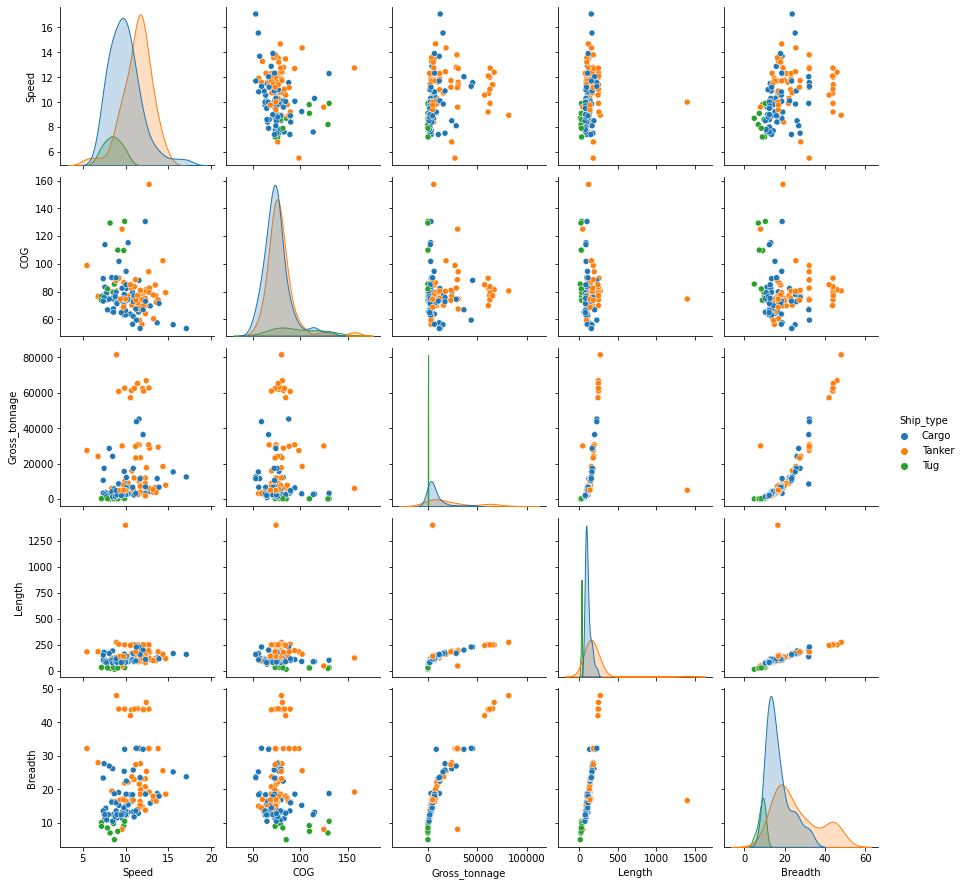

In [20]:
sns.pairplot(shipNumDataToBox,hue='Ship_type')

<p><b>What kind of relationships can you see?</b></p>
<p>Somewhat clear correlations seem to be between Breadth - Gross_tonnage (nonlinear positive), Length - Cross_tonnage (nonlinear positive) and Breadth - Length (linear / exponential? positive).</p>
<p><b>Can you see any outliers?</b></p>
<p><ul><li>Breadth - Gross_tonnage: One cargo, one Tanker</li>
<li>Breadth - Length: One Tanker</li>
<li>Length - Speed: One Tanker</li>
<li>Length - COG: One Tanker</li>
<li>Length - Gross_tonange: Two Tanker</li>
<li>Length - Breadth: One Tanker</li>
<li>Gross_tonange - Breadth: One Tanker</li>
</ul></p>

#### b) Make a new clean dataframe without outlier(s) (and include the most relevant attributes only, or limit to those in next tasks) 

Went from  134  rows to  118  after IQR based removal of outliers!
Printing new plots..


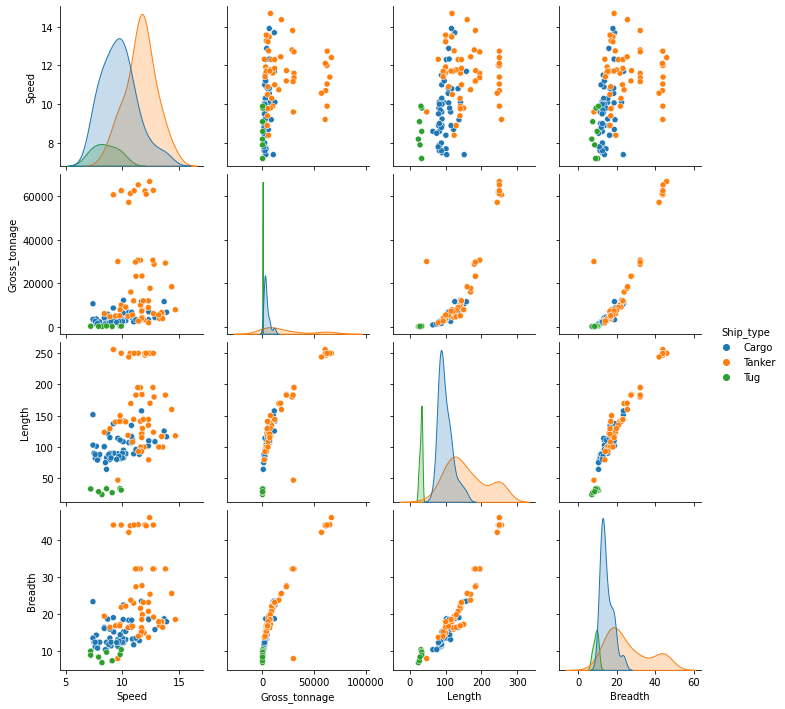

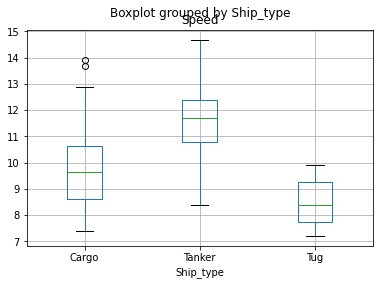

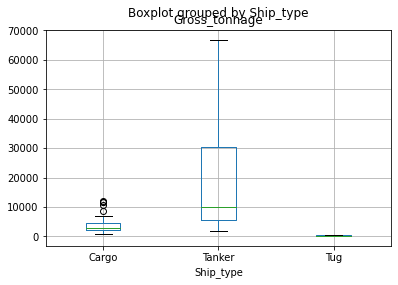

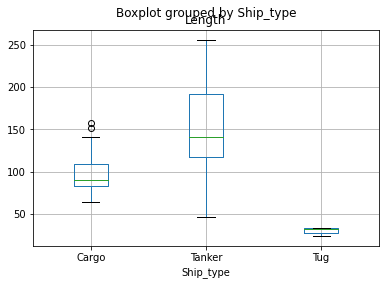

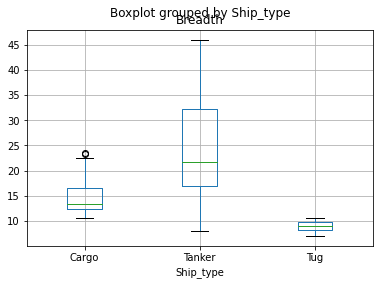

In [21]:
# Creating a new dataset with relevant attributes
shipNumDataToBox=resolvedCombinedShipData.drop(
    ['MMSI','Destination','COG','Origin'],axis=1)
originalLength=len(shipNumDataToBox.index)

# Creating separate worksets by ship type attribute
workDataCargo=shipNumDataToBox.loc[shipNumDataToBox['Ship_type']=='Cargo']
workDataTanker=shipNumDataToBox.loc[shipNumDataToBox['Ship_type']=='Tanker']
workDataTug=shipNumDataToBox.loc[shipNumDataToBox['Ship_type']=='Tug']

# Removing cases clearly outside the 25th and 75th quartiles - Cargo types
Q1=workDataCargo.quantile(0.25)
Q3=workDataCargo.quantile(0.75)
IQR=Q3-Q1 
workDataCargo=workDataCargo[~((workDataCargo<(Q1-1.5*IQR))|
                              (workDataCargo>(Q3+1.5*IQR))).any(axis=1)]

# Removing cases clearly outside the 25th and 75th quartiles - Tanker types
Q1=workDataTanker.quantile(0.25)
Q3=workDataTanker.quantile(0.75)
IQR=Q3-Q1
workDataTanker=workDataTanker[~((workDataTanker<(Q1-1.5*IQR))|
                                (workDataTanker>(Q3+1.5*IQR))).any(axis=1)]

# Removing cases clearly outside the 25th and 75th quartiles - Tug types
# Though, this probably isn't necessary as there were no major outliers.
# With a larger datasetshould most likely be left out to 
# not do unnecessary computing.
Q1=workDataTug.quantile(0.25)
Q3=workDataTug.quantile(0.75)
IQR=Q3-Q1
workDataTug=workDataTug[~((workDataTug<(Q1-1.5*IQR))|
                          (workDataTug>(Q3+1.5*IQR))).any(axis=1)]

shipDataNumNoOutliers=pd.concat([workDataCargo,workDataTanker,workDataTug],ignore_index=True,axis=0)
trimmedLength=len(shipDataNumNoOutliers.index)

print('Went from ',originalLength,' rows to ',trimmedLength,' after IQR based removal of outliers!')
print('Printing new plots..')

sns.pairplot(shipDataNumNoOutliers,hue='Ship_type')
shipDataNumNoOutliers.boxplot('Speed',by='Ship_type')
shipDataNumNoOutliers.boxplot('Gross_tonnage',by='Ship_type')
shipDataNumNoOutliers.boxplot('Length',by='Ship_type')
shipDataNumNoOutliers.boxplot('Breadth',by='Ship_type')

### Correlation and heatmap

#### c) What are Pearson's correlation, Spearman's rho and Kendall's tau? Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? Does the detected outlier affect the correlation? You can use heatmap to visualize the matrices and more easily see the strength of the relationship.

<p><u>Pearson's correlation:</u> Statistic measuring linear correlation between two variables. Returns a value between 1 and -1 where 1 equals a perfect linear positive relationship, 0 no relationship and -1 perfect negative relationship. Requires the data to be interval / ratio level, linearly related and bivariate normally distributed in order to be useful.<br/>
</p>
<p><u>Spearman's rho:</u> Measures the strenght of a monotonic relationship between two variables. Similar to Pearson's it also returns a value between -1 and 1 where the end values indicate a perfect negative or positive monotonic relation.<br/>
Requires the data to be interval or ratio level / ordinal and to be monotonically related. Note: does not place the same normal distribution requirement as Pearson's.</p>
<p><u>Kendall's tau:</u> Measures the strength of dependence between two variables based on the tau coefficient. The returning result is between -1 and 1, -1 representing full negative dependence, 0 representing no relationship and 1 representing complete dependence / perfect relationship.</p>
<p><u>Sources:</u><br/>
https://libguides.library.kent.edu/SPSS/PearsonCorr<br/>
https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf<br/>
https://www.spss-tutorials.com/kendalls-tau/<br/>
https://statisticaloddsandends.wordpress.com/2019/07/08/spearmans-rho-and-kendalls-tau/<br/>
https://re-thought.com/exploring-correlation-in-python/</p>

In [22]:
shipDataNumNoOutliers.corr(method='pearson')

,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.300437,0.419630,0.417175
Gross_tonnage,0.300437,1.000000,0.891508,0.948720
Length,0.419630,0.891508,1.000000,0.967795
Breadth,0.417175,0.948720,0.967795,1.000000


<p>According to Pearson's correlation test:</p>
<p><u><b>Very strong (.7 -) positive linear correlation</b></u>
<ul><li>Gross_tonnage & Length</li>
<li>Gross_tonnage & Breadth</li>
<li>Length & Breadth</li></ul></p>
<p><u><b>Strong (.4-.69) positive linear correlation</b></u>
<ul><li>Speed & Length</li>
<li>Speed & Breadth</li></ul></p>
<p><u><b>Moderate (.3-.39) positive linear correlation</b></u>
<ul><li>Speed & Gross_tonnage</li></ul></p>
<p><br/>Source: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/</p>

In [23]:
shipDataNumNoOutliers.corr(method='spearman')


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.566043,0.516535,0.590998
Gross_tonnage,0.566043,1.000000,0.940612,0.942264
Length,0.516535,0.940612,1.000000,0.957332
Breadth,0.590998,0.942264,0.957332,1.000000


<p>According to Spearman's rho test:</p>
<p><u><b>Very strong (.7 -) positive monotonic association</b></u>
<ul><li>Gross_tonnage & Length</li>
<li>Gross_tonnage & Breadth</li>
<li>Length & Breadth</li></ul></p>
<p><u><b>Strong (.4-.69) positive monotonic association</b></u>
<ul><li>Speed & Length</li>
<li>Speed & Breadth</li>
<li>Speed & Gross_tonnage</li></ul></p>

In [24]:
shipDataNumNoOutliers.corr(method='kendall')


,Speed,Gross_tonnage,Length,Breadth
Speed,1.000000,0.395083,0.359034,0.412099
Gross_tonnage,0.395083,1.000000,0.852719,0.876268
Length,0.359034,0.852719,1.000000,0.848491
Breadth,0.412099,0.876268,0.848491,1.000000


<p>According to Kendall's tau test:</p>
<p><u><b>Very strong (.7 -) positive dependance</b></u>
<ul><li>Gross_tonnage & Length</li>
<li>Gross_tonnage & Breadth</li>
<li>Length & Breadth</li></ul></p>
<p><u><b>Strong (.4-.69) positive dependance</b></u>
<ul><li>Speed & Breadth</li></ul></p>
<p><u><b>Moderate (.3-.39) positive dependance</b></u>
<ul><li>Speed & Gross_tonnage</li>
<li>Speed & Length</li></ul></p>

## BONUS: Dimensionality reduction

#### Explain what principal component analysis is. Do that with and without z-score standardization. Visualize the results with a scatter plot by projecting the data to the first two principal components. How much of the variation is explained with the two principal components?

PCA is a method used to reduce the dimensionality of large data sets. This is done by transforming the set into a smaller one while still retaining most of the original information. Reducing the original information does have its potential effects on accuracy but the advantage gained is increased simplicity of the data. Simplicity in turn means easier and faster processing of the data. Besides reduced time to process the data, other advantages include noise removal due to variables focusing on relevant cases.

With standardization explained_variance_ratio_:  [0.77008606 0.20077488]
With standardization explained_variance_ratio_.cumsum():  [0.77008606 0.97086094]
Without standardization explained_variance_ratio_:  [9.99997980e-01 2.00416102e-06]
Without standardization explained_variance_ratio_.cumsum():  [0.99999798 0.99999998]


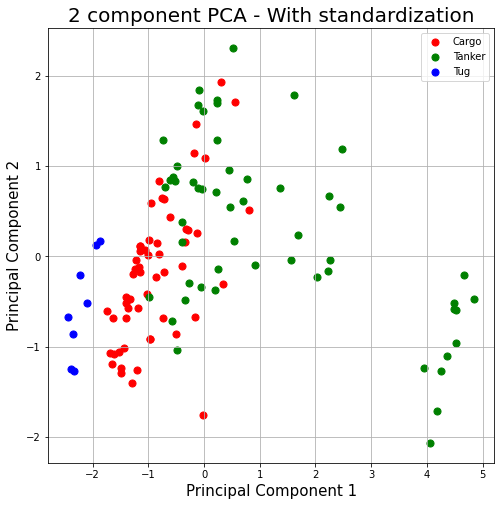

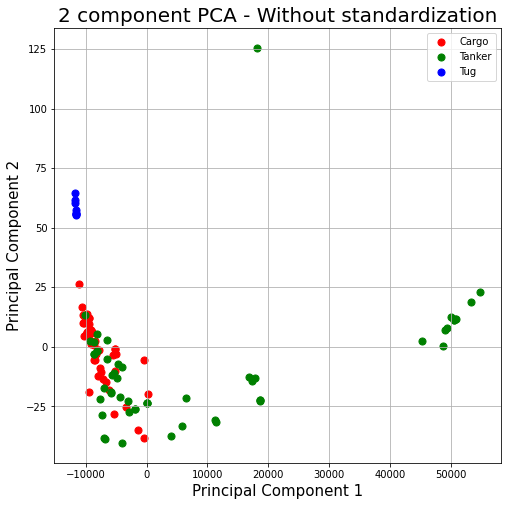

In [25]:
# Done with the help of / by following the tutorial here: 
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pcaNumValues=shipDataNumNoOutliers

# With standardization
features=['Speed','Gross_tonnage','Length','Breadth']
featureValues=pcaNumValues.loc[:,features].values

# Saving for without standardization
featureValuesNoStd=featureValues

targetValues=pcaNumValues.loc[:,['Ship_type']].values
featureValues=StandardScaler().fit_transform(featureValues)
pca = PCA(n_components=2)
princComps=pca.fit_transform(featureValues)
principalDf=pd.DataFrame(data=princComps,columns=['Principal component 1',
                                                  'Principal component 2'])
finalPCADf=pd.concat([principalDf,pcaNumValues[['Ship_type']]],axis=1)

# Without standardization
pcaWO = PCA(n_components=2)
princCompsWO=pcaWO.fit_transform(featureValuesNoStd)
principalDfWO=pd.DataFrame(data=princCompsWO,columns=['Principal component 1',
                                                      'Principal component 2'])
finalPCADfWO=pd.concat([principalDfWO,pcaNumValues[['Ship_type']]],axis=1)

# Plotting the standardized data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA - With standardization', fontsize = 20)
targets = ['Cargo', 'Tanker', 'Tug']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalPCADf['Ship_type']==target
    ax.scatter(finalPCADf.loc[indicesToKeep,'Principal component 1'],
               finalPCADf.loc[indicesToKeep,'Principal component 2'],
               c=color,s=50)
ax.legend(targets)
ax.grid()

# Plotting the non-standardized data
fig = plt.figure(figsize=(8,8))
ax2 = fig.add_subplot(1,1,1) 
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 component PCA - Without standardization', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = finalPCADfWO['Ship_type']==target
    ax2.scatter(finalPCADfWO.loc[indicesToKeep,'Principal component 1'],
                finalPCADfWO.loc[indicesToKeep,'Principal component 2'],
                c=color,s=50)
ax2.legend(targets)
ax2.grid()

# Variance explained with two principal components
print('With standardization explained_variance_ratio_: ',
      pca.explained_variance_ratio_)
print('With standardization explained_variance_ratio_.cumsum(): ',
      pca.explained_variance_ratio_.cumsum())
print('Without standardization explained_variance_ratio_: ',
      pcaWO.explained_variance_ratio_)
print('Without standardization explained_variance_ratio_.cumsum(): ',
      pcaWO.explained_variance_ratio_.cumsum())

<p>With standardized values the first principal component contained ~77.01% of the variance while the second principal component contained ~20.08% of the variance. Together they contained roughly 97,09% of the information.</p>
<p>With non-standardized values the first principle component alone contained 99.99% of the variance.</p>
<p>Plotting the non-standardized values is heavily dominated by the extreme values withing the plot, thus making cargo type values hard to distinguish from tanker type values. While this is somewhat the case within the standardized plot as well, the two are not nearly as mixed. Tug type values are separated in both. Overall, comparing the two plots shows the importance of standardizing.</p>

In [26]:
#colab_pdf('DAKD2020_exercise2.ipynb')